Gradient Descent:
 
SGD:
 
RMSProp:
 
Adam:
 
Nadam:
 


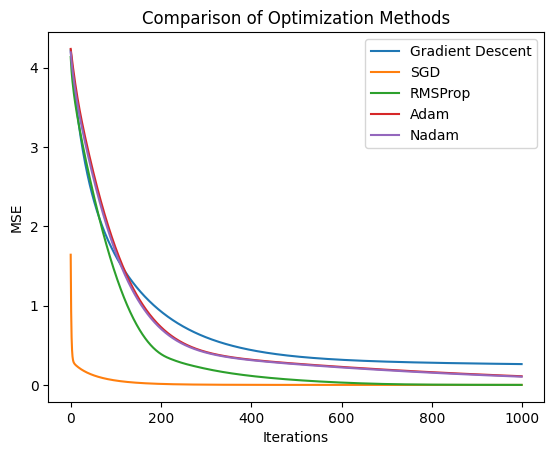


1. **Small Datasets:**
   - **Gradient Descent (GD)** and **Stochastic Gradient Descent (SGD)** are effective for small datasets.
   - GD provides stable updates but can be slower due to full-batch computation.
   - SGD is faster per iteration but may exhibit more variance in updates.

2. **Large Datasets and Complex Loss Functions:**
   - **Adam** and **Nadam** are generally the most effective.
   - These methods combine the benefits of **adaptive learning rates** and **momentum**, leading to faster convergence and better stability.
   - **Adam** is particularly popular due to its robustness and ease of tuning.
   - **Nadam** (Adam with Nesterov momentum) often provides slight improvements over Adam by incorporating lookahead gradient updates.

3. **Adaptive Methods (RMSProp, Adam, Nadam):**
   - These methods adapt the learning rate for each parameter, making them suitable for problems with varying curvature or sparse gradients.
   - They are less sensitive to hyperparameter choices

In [1]:
import numpy as np
import time
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Data Generation
# Set a fixed seed for the random number generator for reproducibility
np.random.seed(42)

def polynomial(x1, x2):
    # Function calculates the value of a second-degree polynomial for given x1 and x2
    return 4 * x1**2 + 5 * x2**2 - 2 * x1 * x2 + 3 * x1 - 6 * x2

# Generate 100 random values for features x1 and x2
x1 = np.random.rand(100)
x2 = np.random.rand(100)
# Calculate the target variable y using the polynomial
y = polynomial(x1, x2)
# Combine x1 and x2 into a single feature matrix
X = np.column_stack((x1, x2))

# Step 2: Generate Polynomial Features
# Use PolynomialFeatures to create new features up to the second degree
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Gradient Descent Variants

def mean_squared_error(y_true, y_pred):
    # Function calculates the mean squared error between true and predicted values
    return np.mean((y_true - y_pred)**2)

def polynomial_regression_gradient_descent(X, y, lr=0.01, iterations=1000):
    # Implementation of the standard gradient descent method
    m, n = X.shape  # Number of examples (m) and features (n)
    theta = np.zeros(n)  # Initialize coefficients with zeros
    losses = []  # List to store error values
    for _ in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)  # Calculate gradients
        theta -= lr * gradients  # Update coefficients
        losses.append(mean_squared_error(y, X.dot(theta)))  # Save error
    return theta, losses

def polynomial_regression_SGD(X, y, lr=0.01, iterations=1000):
    # Implementation of Stochastic Gradient Descent (SGD)
    m, n = X.shape
    theta = np.zeros(n)
    losses = []
    for _ in range(iterations):
        for i in range(m):
            gradients = 2 * X[i].T.dot(X[i].dot(theta) - y[i])  # Gradient for one example
            theta -= lr * gradients  # Update coefficients
        losses.append(mean_squared_error(y, X.dot(theta)))  # Save error
    return theta, losses

def polynomial_regression_rmsprop(X, y, lr=0.01, iterations=1000, beta=0.9, epsilon=1e-8):
    # Implementation of the RMSProp method
    m, n = X.shape
    theta = np.zeros(n)
    sq_grads = np.zeros(n)  # Exponentially weighted average of squared gradients
    losses = []
    for _ in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)  # Calculate gradients
        sq_grads = beta * sq_grads + (1 - beta) * gradients**2  # Update average
        theta -= lr * gradients / (np.sqrt(sq_grads) + epsilon)  # Update coefficients
        losses.append(mean_squared_error(y, X.dot(theta)))  # Save error
    return theta, losses

def polynomial_regression_adam(X, y, lr=0.01, iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Implementation of the Adam method
    m, n = X.shape
    theta = np.zeros(n)
    m_grads = np.zeros(n)  # Exponentially weighted average of gradients
    v_grads = np.zeros(n)  # Exponentially weighted average of squared gradients
    losses = []
    for t in range(1, iterations + 1):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)  # Calculate gradients
        m_grads = beta1 * m_grads + (1 - beta1) * gradients  # Update m
        v_grads = beta2 * v_grads + (1 - beta2) * gradients**2  # Update v
        m_hat = m_grads / (1 - beta1**t)  # Bias correction for m
        v_hat = v_grads / (1 - beta2**t)  # Bias correction for v
        theta -= lr * m_hat / (np.sqrt(v_hat) + epsilon)  # Update coefficients
        losses.append(mean_squared_error(y, X.dot(theta)))  # Save error
    return theta, losses

def polynomial_regression_nadam(X, y, lr=0.01, iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Implementation of the Nadam method
    m, n = X.shape
    theta = np.zeros(n)
    m_grads = np.zeros(n)
    v_grads = np.zeros(n)
    losses = []
    for t in range(1, iterations + 1):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)  # Calculate gradients
        m_grads = beta1 * m_grads + (1 - beta1) * gradients  # Update m
        v_grads = beta2 * v_grads + (1 - beta2) * gradients**2  # Update v
        m_hat = m_grads / (1 - beta1**t)  # Bias correction for m
        v_hat = v_grads / (1 - beta2**t)  # Bias correction for v
        theta -= lr * (beta1 * m_hat + (1 - beta1) * gradients / (1 - beta1**t)) / (np.sqrt(v_hat) + epsilon)  # Update coefficients
        losses.append(mean_squared_error(y, X.dot(theta)))  # Save error
    return theta, losses

# Step 4: Measuring Execution Time of Methods
# Use the magic command %timeit to evaluate execution time
print("Gradient Descent:")
# %timeit polynomial_regression_gradient_descent(X_poly, y)
print(" ")

print("SGD:")
# %timeit polynomial_regression_SGD(X_poly, y)
print(" ")

print("RMSProp:")
# %timeit polynomial_regression_rmsprop(X_poly, y)
print(" ")

print("Adam:")
# %timeit polynomial_regression_adam(X_poly, y)
print(" ")

print("Nadam:")
# %timeit polynomial_regression_nadam(X_poly, y)
print(" ")

# Step 5: Experiment with the Number of Iterations
import matplotlib.pyplot as plt

def plot_losses(losses, label):
    # Function to visualize the change in error over iterations
    plt.plot(losses, label=label)

iterations = 1000  # Number of iterations for comparing methods

# Execute each method and save their errors
_, gd_losses = polynomial_regression_gradient_descent(X_poly, y, iterations=iterations)
_, sgd_losses = polynomial_regression_SGD(X_poly, y, iterations=iterations)
_, rmsprop_losses = polynomial_regression_rmsprop(X_poly, y, iterations=iterations)
_, adam_losses = polynomial_regression_adam(X_poly, y, iterations=iterations)
_, nadam_losses = polynomial_regression_nadam(X_poly, y, iterations=iterations)

# Plot graphs for all methods
plot_losses(gd_losses, label="Gradient Descent")
plot_losses(sgd_losses, label="SGD")
plot_losses(rmsprop_losses, label="RMSProp")
plot_losses(adam_losses, label="Adam")
plot_losses(nadam_losses, label="Nadam")

# Configure the plot
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Comparison of Optimization Methods")
plt.legend()
plt.show()

print("""
1. **Small Datasets:**
   - **Gradient Descent (GD)** and **Stochastic Gradient Descent (SGD)** are effective for small datasets.
   - GD provides stable updates but can be slower due to full-batch computation.
   - SGD is faster per iteration but may exhibit more variance in updates.

2. **Large Datasets and Complex Loss Functions:**
   - **Adam** and **Nadam** are generally the most effective.
   - These methods combine the benefits of **adaptive learning rates** and **momentum**, leading to faster convergence and better stability.
   - **Adam** is particularly popular due to its robustness and ease of tuning.
   - **Nadam** (Adam with Nesterov momentum) often provides slight improvements over Adam by incorporating lookahead gradient updates.

3. **Adaptive Methods (RMSProp, Adam, Nadam):**
   - These methods adapt the learning rate for each parameter, making them suitable for problems with varying curvature or sparse gradients.
   - They are less sensitive to hyperparameter choices compared to GD and SGD.

4. **Trade-offs:**
   - **GD** and **SGD** are simpler and require less memory, making them suitable for small-scale problems.
   - **Adam** and **Nadam** are more computationally intensive but provide faster convergence and better performance for complex tasks.

5. **Recommendations:**
   - For **small datasets**, start with **GD** or **SGD**.
   - For **large datasets** or **complex models**, prefer **Adam** or **Nadam**.
   - Always experiment with hyperparameters (e.g., learning rate, momentum) to achieve optimal results.
""")